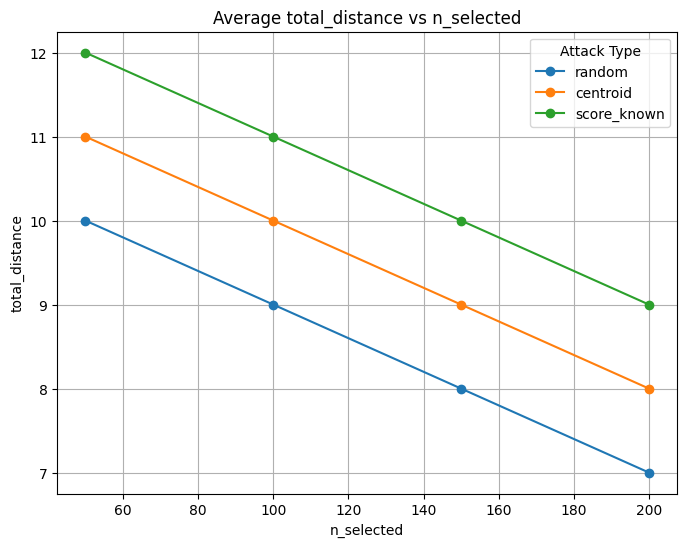

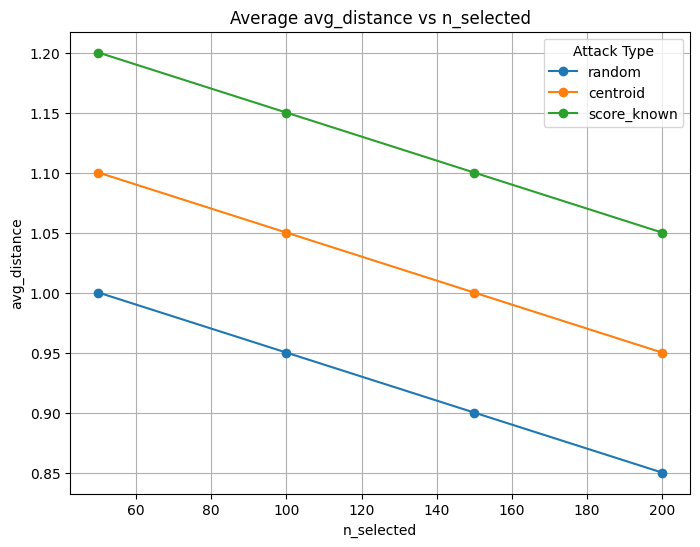

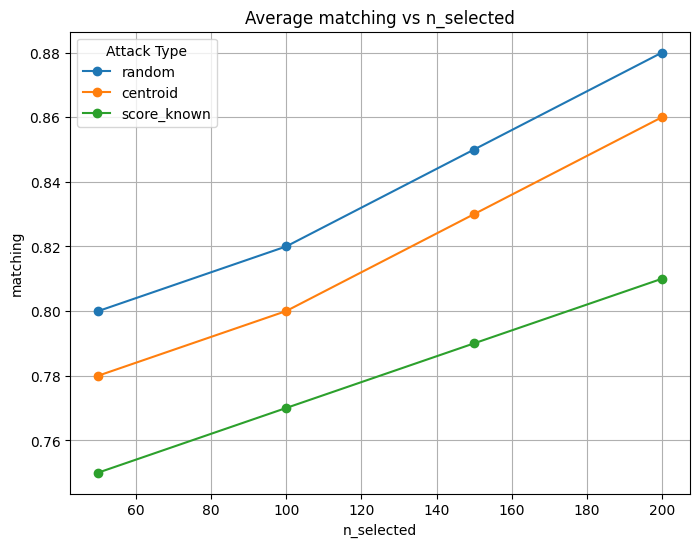

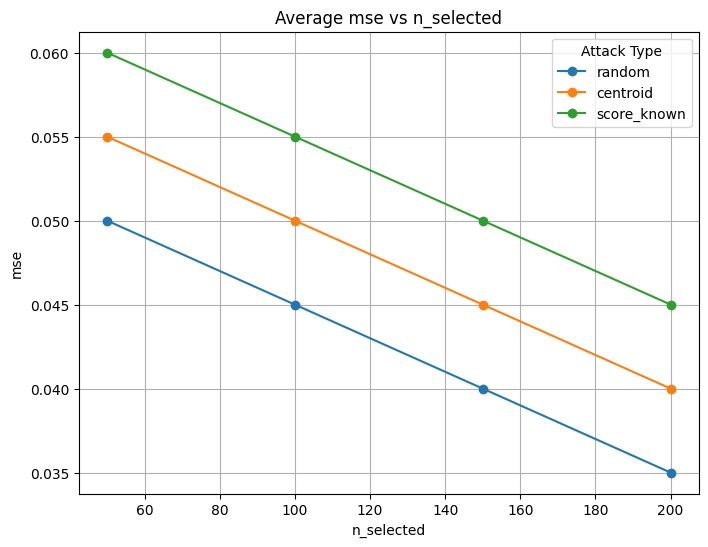

In [2]:
import matplotlib.pyplot as plt

def plot_metrics(avg_metrics_by_attack):
    """
    For each metric (total_distance, avg_distance, matching, mse), plot a separate graph
    showing the performance for each attack type over different n_selected values.
    
    :param avg_metrics_by_attack: Dictionary containing metrics for each attack type.
           Expected format:
           {
               "attack_type1": {
                   "n_selected": [...],
                   "total_distance": [...],
                   "avg_distance": [...],
                   "matching": [...],
                   "mse": [...]
               },
               "attack_type2": { ... },
               ...
           }
    """
    metrics = ["total_distance", "avg_distance", "matching", "mse"]

    for metric in metrics:
        plt.figure(figsize=(8, 6))
        
        # List to keep track of plotted line objects.
        lines = []
        
        for attack, values in avg_metrics_by_attack.items():
            n_selected = values.get("n_selected", [])
            metric_values = values.get(metric, [])
            
            # Only plot if both lists are non-empty.
            if n_selected and metric_values:
                # Plot with a label that is the attack type.
                line, = plt.plot(n_selected, metric_values, marker='o', label=str(attack))
                lines.append(line)
        
        plt.xlabel("n_selected")
        plt.ylabel(metric)
        plt.title(f"Average {metric} vs n_selected")
        
        # Only call legend() if there are plotted lines.
        if lines:
            plt.legend(title="Attack Type")
        else:
            print(f"No valid data to plot for metric: {metric}")
        
        plt.grid(True)
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Dummy data for demonstration. Replace with your actual avg_metrics_by_attack.
    avg_metrics_by_attack = {
        "random": {
            "n_selected": [50, 100, 150, 200],
            "total_distance": [10, 9, 8, 7],
            "avg_distance": [1, 0.95, 0.9, 0.85],
            "matching": [0.8, 0.82, 0.85, 0.88],
            "mse": [0.05, 0.045, 0.04, 0.035]
        },
        "centroid": {
            "n_selected": [50, 100, 150, 200],
            "total_distance": [11, 10, 9, 8],
            "avg_distance": [1.1, 1.05, 1, 0.95],
            "matching": [0.78, 0.8, 0.83, 0.86],
            "mse": [0.055, 0.05, 0.045, 0.04]
        },
        "score_known": {
            "n_selected": [50, 100, 150, 200],
            "total_distance": [12, 11, 10, 9],
            "avg_distance": [1.2, 1.15, 1.1, 1.05],
            "matching": [0.75, 0.77, 0.79, 0.81],
            "mse": [0.06, 0.055, 0.05, 0.045]
        }
    }
    
    plot_metrics(avg_metrics_by_attack)
